# Freefall

This sample uses [bacon-poly2](https://github.com/Haishi2016/bacon-net/) to rediscover the freefall formula: 

![freefall](https://github.com/Haishi2016/bacon-net/raw/main/images/freefall.png)

In [3]:
from bacon import dataCreator
from nets.poly2 import poly2
import numpy as np

In [2]:
# Create a new instance of Bacon-Poly2 network
net = poly2()

To train the network, you'll need a dataset with three columns: input `a`, input `b`, and expected output. Bacon-Net comes with a `dataCreator` utility that can help you to create such a dataset using a lambda expression you provide. The method also takes an optional `singleVariable` parameter. When set, the input `b` colum is populated with zeros.

In [19]:
# generate 1000 data entries, scaled to [0,1], with lambda y = 1/2Gx^2 G=9.81
a, b, y = dataCreator.create(1000, 1, lambda a, b: 0.5 * 9.81 * a * a, singleVariable=True)


In [20]:
# OPTIONAL: print out the dataset
print(np.column_stack((a,b,y)))

[[0.81496368 0.         3.25773327]
 [0.69189606 0.         2.34812239]
 [0.56146997 0.         1.54629402]
 ...
 [0.68598386 0.         2.30816476]
 [0.8318971  0.         3.39451895]
 [0.02705759 0.         0.00359102]]


In [21]:
# Train the network
history = net.fit(a,b,y)

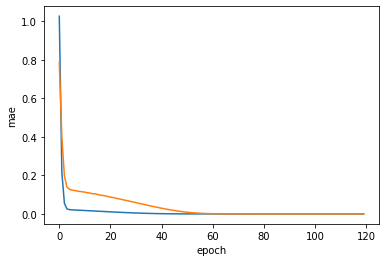

In [22]:
# OPTIONAL: Plot learning history. Bacon-Net does early stopping after no improvements after 10 iterations
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['mae'])
plt.ylabel('mae')
plt.xlabel('epoch')
plt.show()

In [23]:
# Explain the network
m = net.explain(singleVariable=True)
print(m)

z = 4.905x^2


Congratulations! You've just re-discovered the freefall formula!

In [24]:
# OPTIONAL: Use the network to make predictions
y = net.predict(1)
print(y)

4.9049993


In [27]:
# OPTIONAL: Run prediction on an array
y = net.predict([1,2,3,4,5])
print(y)

[  4.9049993  19.619995   44.14499    78.47998   122.62496  ]


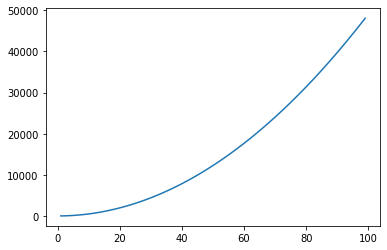

In [28]:
# OPTIONAL: Plot the function
x = np.arange(1,100,1).tolist()
y = net.predict(x)
plt.plot(x, y)
plt.show()